In [1]:
import numpy as np
import pandas as pd

In [2]:
# load the data
credit_card = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard.csv")
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(credit_card, test_size = 0.2, random_state = 42)

In [5]:
credit_train_features = train_set.drop(columns="Class")
credit_train_labels = train_set["Class"].copy()
credit_test_features = test_set.drop(columns="Class")
credit_test_labels = test_set["Class"].copy()

In [6]:
# train the logistic regression classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(credit_train_features, credit_train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# get the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
credit_pred = cross_val_predict(log_reg, credit_train_features, credit_train_labels, cv = 3)
confusion_matrix(credit_train_labels, credit_pred)

array([[227408,     43],
       [   138,    256]])

In [10]:
# finding the f1 score
from sklearn.metrics import f1_score
f1_score(credit_train_labels, credit_pred)

0.7388167388167387

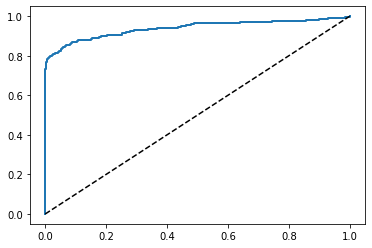

In [11]:
# plotting the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
decision_score = cross_val_predict(log_reg, credit_train_features, credit_train_labels, cv = 3, method = "decision_function")
fpr, tpr, thresholds = roc_curve(credit_train_labels, decision_score)

def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1], [0,1], 'k--')
  [...]

plot_roc_curve(fpr, tpr)
plt.show()

In [12]:
# measure area under the ROC curve
roc_auc_score(credit_train_labels, decision_score)

0.9388212069194041

In [14]:
# dump information to that file
import pickle
pickle.dump(log_reg, open('/content/drive/MyDrive/Datasets/creditcard.pkl', 'wb'))